# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Import Dataset

In [2]:
creditcard_df = pd.read_csv("Marketing_data.csv")
creditcard_df.head(10)

# CUSTID: Identification of Credit Card holder 
# BALANCE: Balance amount left in customer's account to make purchases
# BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
# PURCHASES: Amount of purchases made from account
# ONEOFFPURCHASES: Maximum purchase amount done in one-go
# INSTALLMENTS_PURCHASES: Amount of purchase done in installment
# CASH_ADVANCE: Cash in advance given by the user
# PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
# ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
# PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
# CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
# CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
# PURCHASES_TRX: Number of purchase transactions made
# CREDIT_LIMIT: Limit of Credit Card for user
# PAYMENTS: Amount of Payment done by user
# MINIMUM_PAYMENTS: Minimum amount of payments made by user  
# PRC_FULL_PAYMENT: Percent of full payment paid by user
# TENURE: Tenure of credit card service for user

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [3]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
# Pull up customer with outlier one-off purchase
creditcard_df[creditcard_df["ONEOFF_PURCHASES"] == creditcard_df["ONEOFF_PURCHASES"].max()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [6]:
# Pull up customer with outlier cash advance
creditcard_df[creditcard_df["CASH_ADVANCE"] == creditcard_df["CASH_ADVANCE"].max()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


# Clean Data

<Axes: >

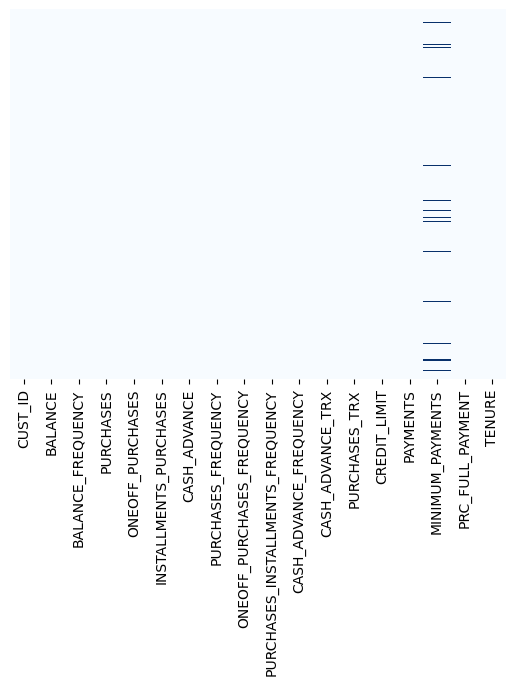

In [7]:
# Visualize missing data

sns.heatmap(creditcard_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

In [8]:
# Show missing values
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
# Impute missing values with the mean

creditcard_df.loc[creditcard_df["CREDIT_LIMIT"].isnull(), "CREDIT_LIMIT"] = creditcard_df["CREDIT_LIMIT"].mean()
creditcard_df.loc[creditcard_df["MINIMUM_PAYMENTS"].isnull(), "MINIMUM_PAYMENTS"] = creditcard_df["MINIMUM_PAYMENTS"].mean()

In [10]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [11]:
# Check for duplicates
creditcard_df.duplicated().sum()

0

In [12]:
# Drop "CUST_ID" column

creditcard_df.drop("CUST_ID", axis=1, inplace=True)
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Perform Visualizations

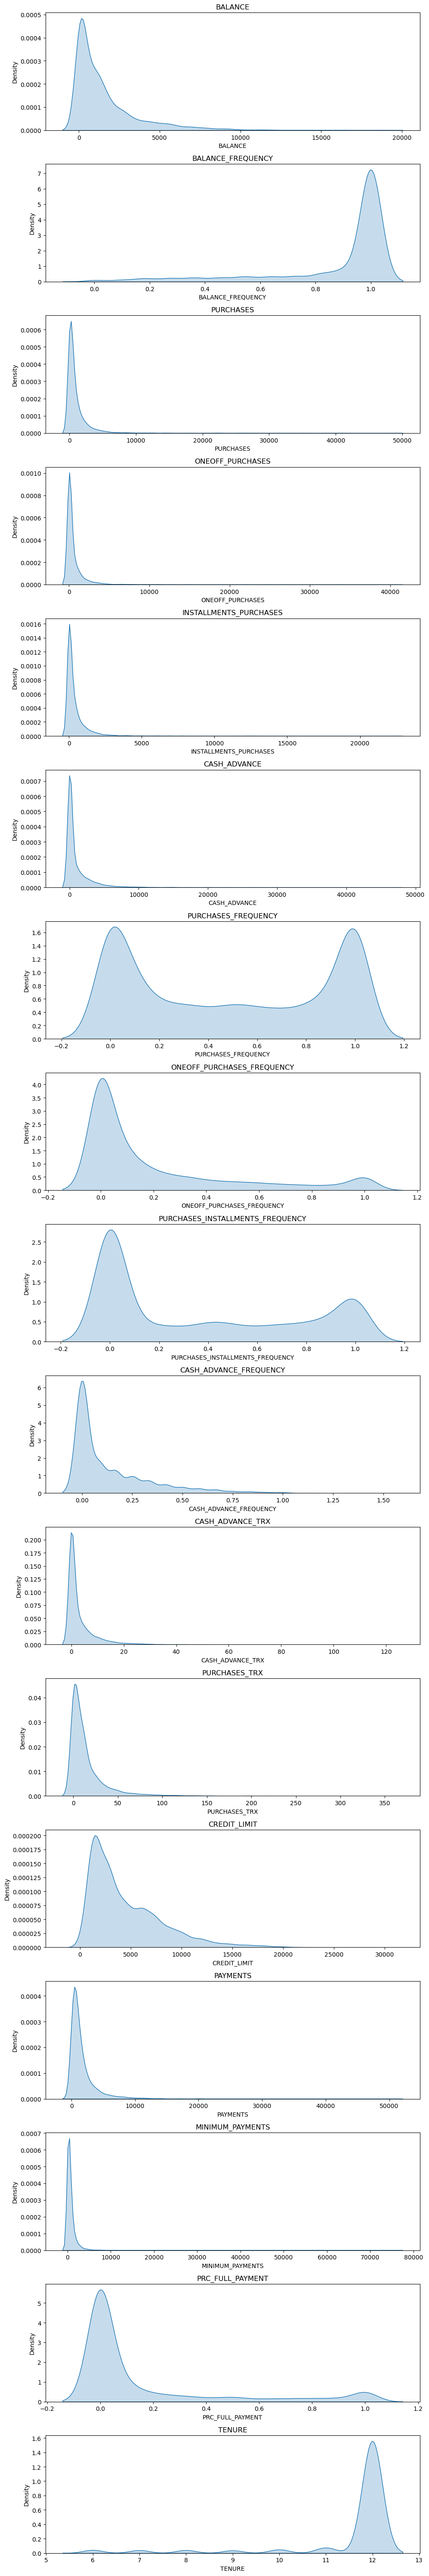

In [13]:
# Plot the distribution of features

plt.figure(figsize=(10, 60))

cols = creditcard_df.columns

for i, col in enumerate(cols):
    plt.subplot(len(cols), 1, i+1)
    sns.kdeplot(creditcard_df[col], fill=True)
    plt.title(col)
    
plt.tight_layout()

<Axes: >

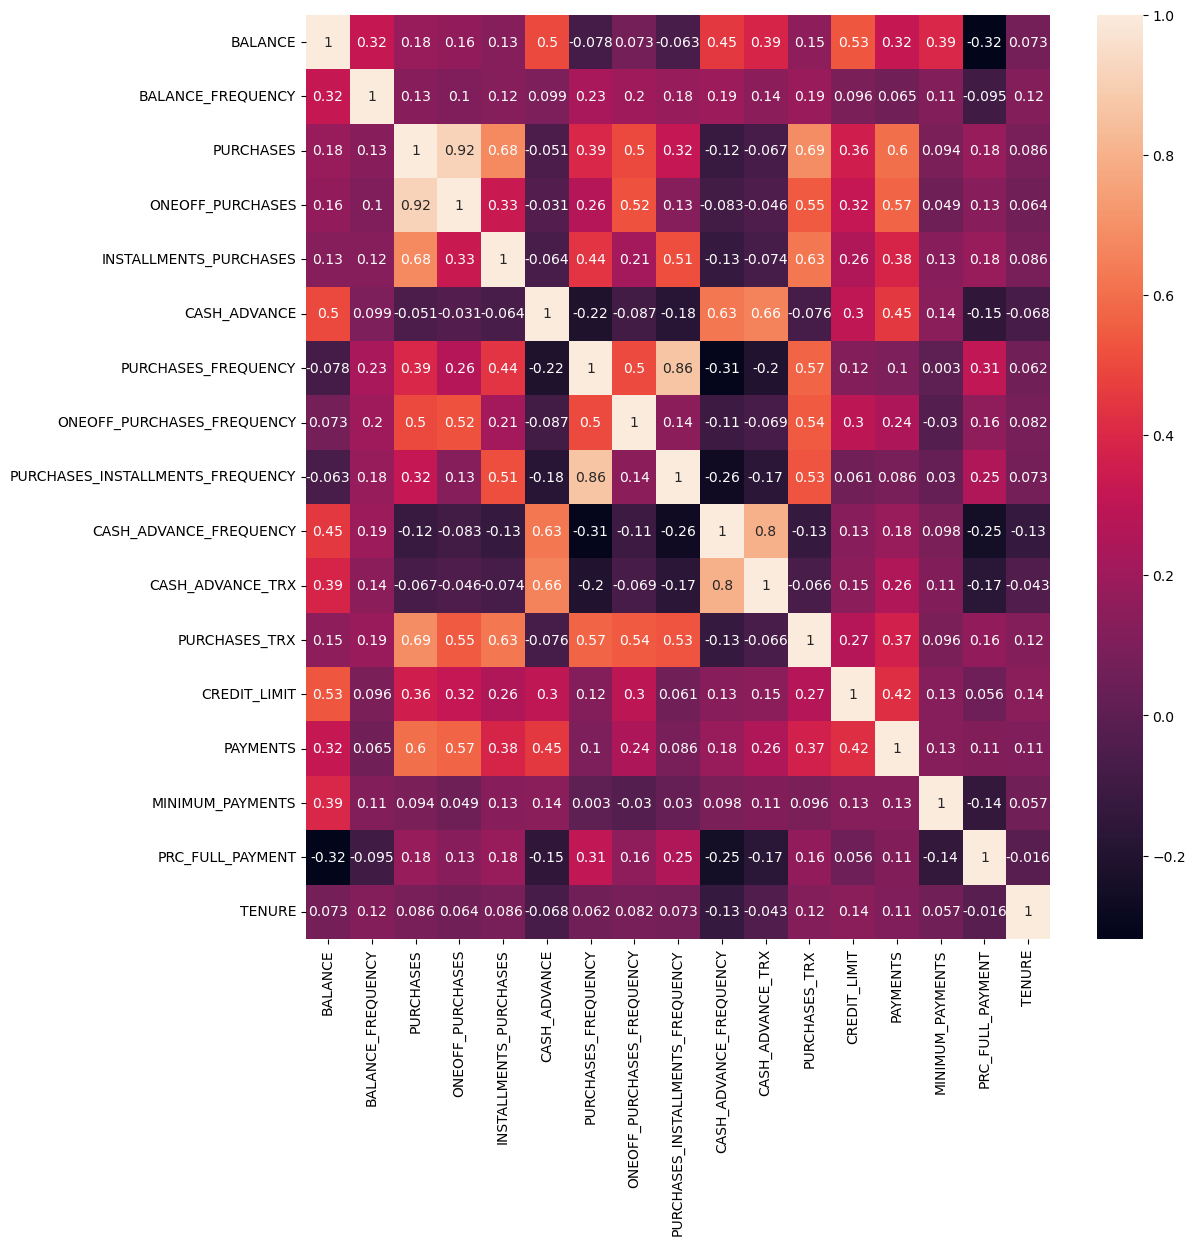

In [14]:
# Plot the correlation between features

plt.figure(figsize=(12, 12))

correlations = creditcard_df.corr()
sns.heatmap(correlations, annot=True)

# Find the Optimal Number of Clusters

In [15]:
# Scale the data

scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)
creditcard_df_scaled.shape

(8950, 17)

In [16]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [17]:
# Compute the inertia for different number of clusters

inertia = []

for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit_transform(creditcard_df_scaled)
    inertia.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

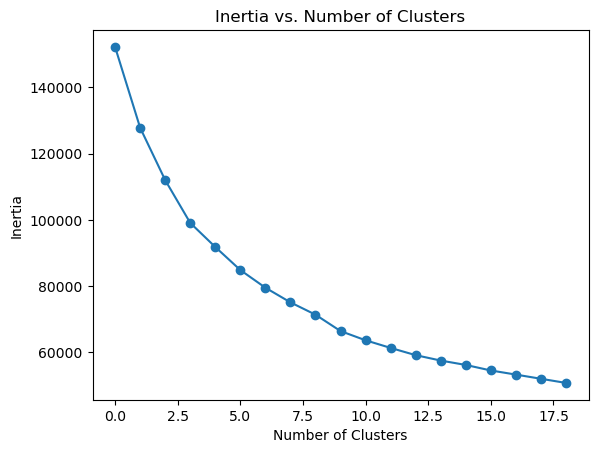

In [18]:
# Plot the inertia vs. number of clusters

plt.plot(inertia, 'o-')
plt.title("Inertia vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")

# Apply K-Means Clustering

In [19]:
# Fit the K-means algorithm to the scaled data and obtain the cluster labels

n_clusters = 8

kmeans = KMeans(n_clusters, n_init=10, random_state=2023)
kmeans.fit_transform(creditcard_df_scaled)
labels = kmeans.labels_
labels

array([1, 6, 0, ..., 4, 4, 4])

In [20]:
labels.shape

(8950,)

In [21]:
# Obtain the cluster centers

cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=[creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.175310,0.391735,0.497252,0.641160,-0.002331,-0.340031,0.957984,1.909508,0.099299,-0.425421,-0.339663,0.550959,0.395980,0.113876,-0.168017,0.457737,0.262884
1,0.017398,0.403546,-0.359011,-0.243831,-0.400804,-0.092968,-0.860713,-0.402830,-0.756645,0.106065,-0.026968,-0.484105,-0.303418,-0.250477,-0.004434,-0.456843,0.272881
2,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044064,8.098975,1.120318,1.110132,0.310863
3,0.979528,0.467519,2.270792,1.708875,2.229808,-0.186120,1.161010,1.531202,1.265788,-0.300358,-0.200451,2.833756,1.235568,1.292810,0.649751,0.234752,0.338429
4,-0.336050,-0.347078,-0.289267,-0.215966,-0.286835,0.068284,-0.203078,-0.288661,-0.224549,0.308663,0.000996,-0.388117,-0.567159,-0.392680,-0.209145,0.014011,-3.203733
5,-0.701368,-2.145072,-0.312447,-0.237526,-0.302285,-0.321782,-0.556727,-0.445738,-0.439325,-0.520713,-0.376018,-0.419883,-0.177196,-0.203414,-0.256627,0.280785,0.199062
6,1.678019,0.392002,-0.217092,-0.154868,-0.228860,2.015727,-0.472968,-0.202935,-0.414379,1.923845,1.937404,-0.262840,1.023151,0.821202,0.508716,-0.391332,0.070181
7,-0.363621,0.334009,-0.035810,-0.240148,0.356334,-0.362835,0.990568,-0.376809,1.203174,-0.471158,-0.357945,0.191196,-0.256761,-0.214721,-0.055252,0.308348,0.256722


In [22]:
# Perform inverse transformation to regain the original units

cluster_centers_inv = scaler.inverse_transform(cluster_centers)
cluster_centers_inv = pd.DataFrame(cluster_centers_inv, columns=[creditcard_df.columns])
cluster_centers_inv

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1199.581617,0.970069,2065.592120,1656.632258,408.959862,265.810881,0.874836,0.772101,0.403901,0.050013,0.930876,28.404608,5935.186426,2062.803305,472.650694,0.287595,11.869124
1,1600.688094,0.972867,236.171969,187.727328,48.625783,783.913762,0.144905,0.082286,0.063727,0.156369,3.064788,2.676794,3390.489263,1008.036714,853.872714,0.020096,11.882504
2,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333
3,3603.279406,0.988022,5854.785980,3428.819355,2427.455459,588.568798,0.956320,0.659245,0.867494,0.075039,1.880893,85.146402,8989.950372,5475.702196,2378.423983,0.222376,11.970223
4,865.015978,0.795051,385.181720,233.977974,151.686061,1122.064941,0.408846,0.116344,0.275196,0.196911,3.255627,5.062701,2430.891398,596.373827,376.802926,0.157813,7.229904
5,104.637027,0.369123,335.656938,198.193215,137.715462,304.079507,0.266909,0.069485,0.189838,0.030944,0.682782,4.273113,3849.736594,1144.281146,266.148080,0.235839,11.783715
6,5057.128707,0.970132,539.384415,335.388635,204.112374,5205.945201,0.300526,0.141918,0.199752,0.520125,16.470183,8.176606,8217.092369,4110.444142,2049.746629,0.039257,11.611239
7,807.629349,0.956394,926.695767,193.840133,733.296325,217.988329,0.887913,0.090048,0.842610,0.040861,0.806117,19.462259,3560.246770,1111.547034,735.444786,0.243901,11.860878


In [23]:
# Add 'Cluster' column to the original data frame

creditcard_df["Cluster"] = labels
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,6
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


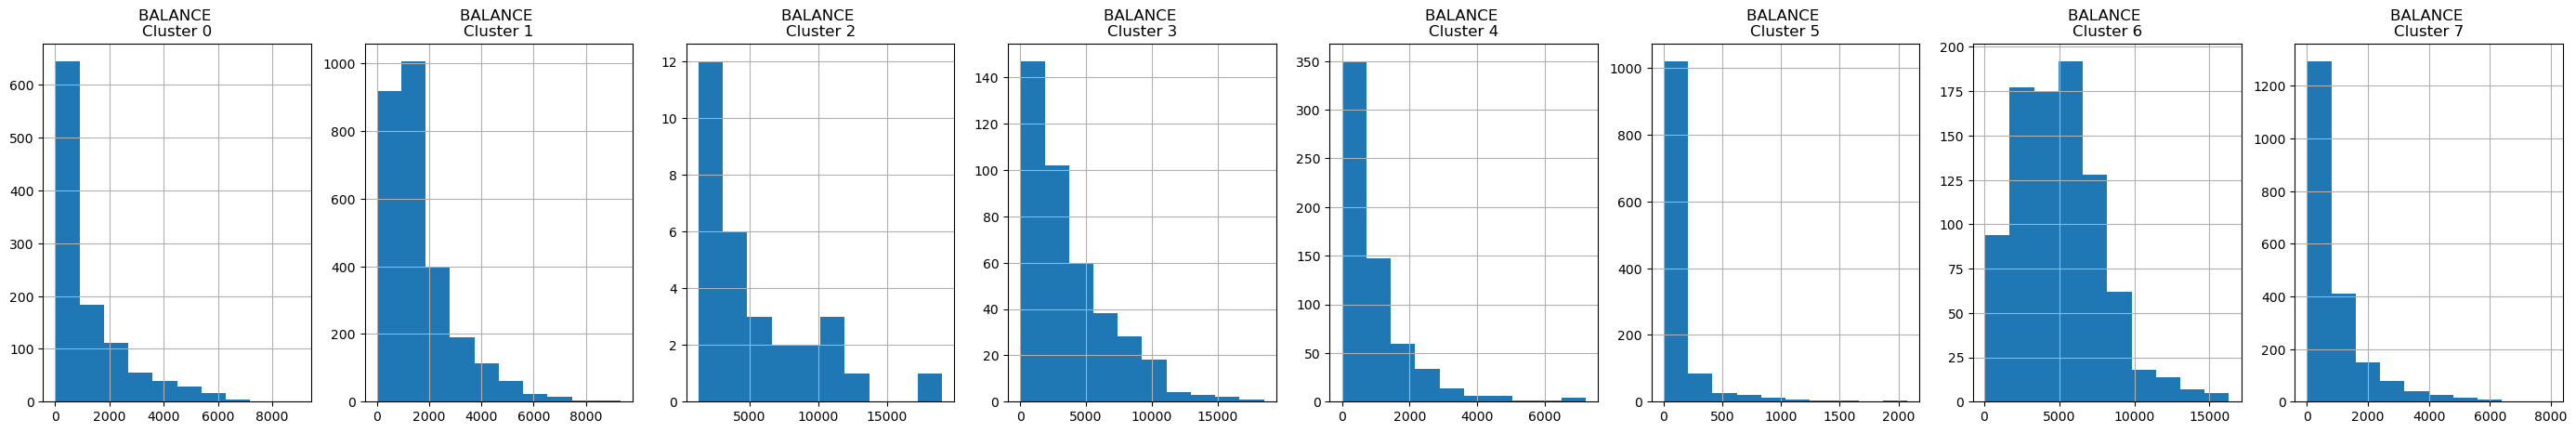

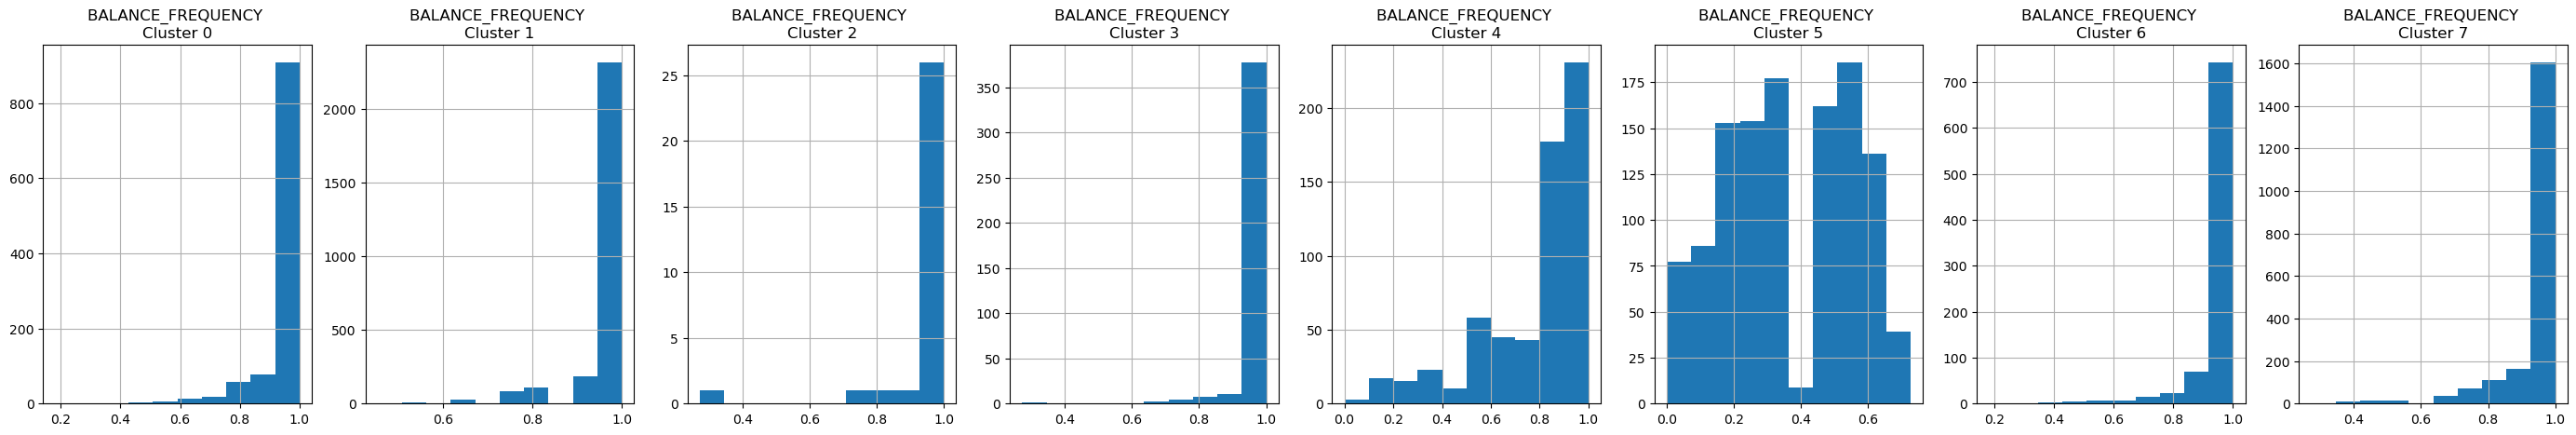

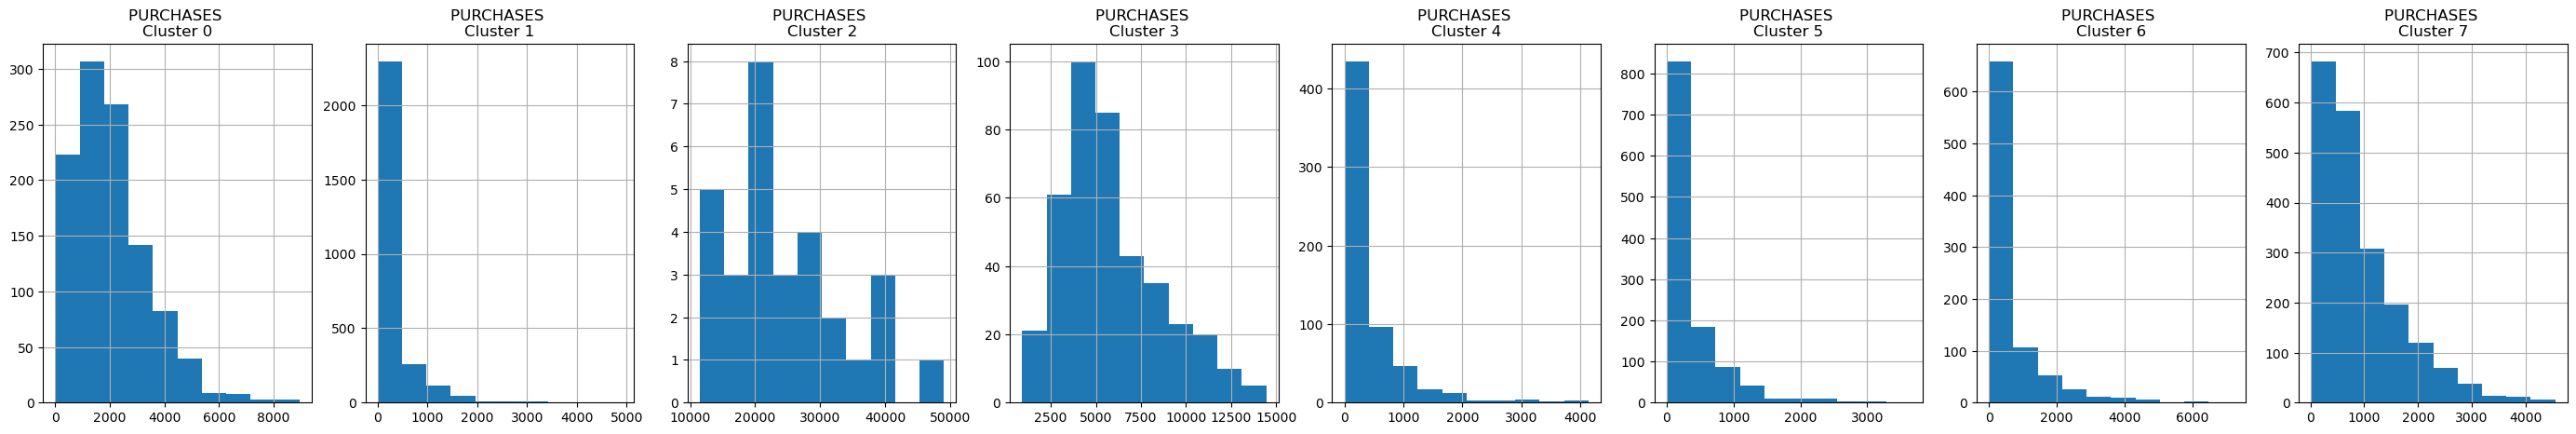

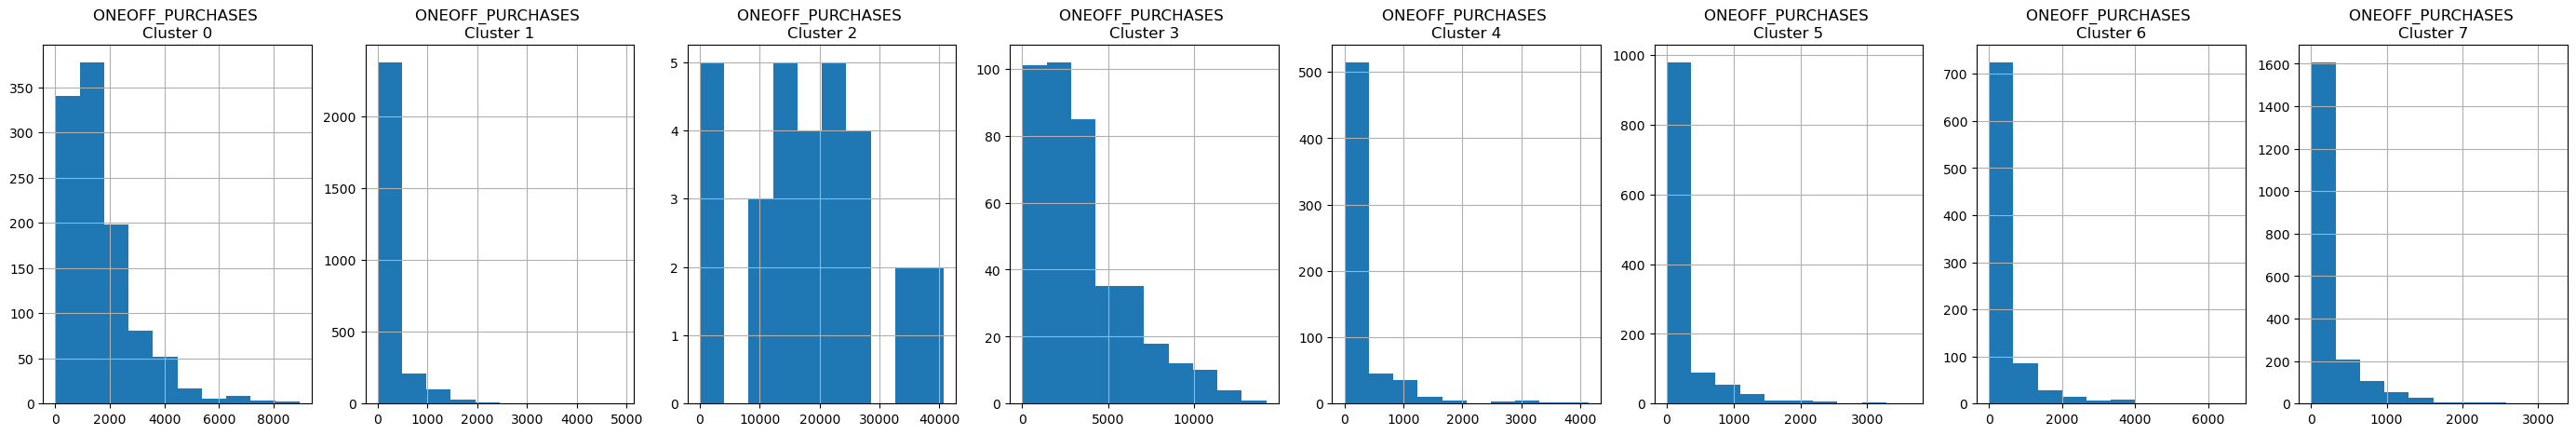

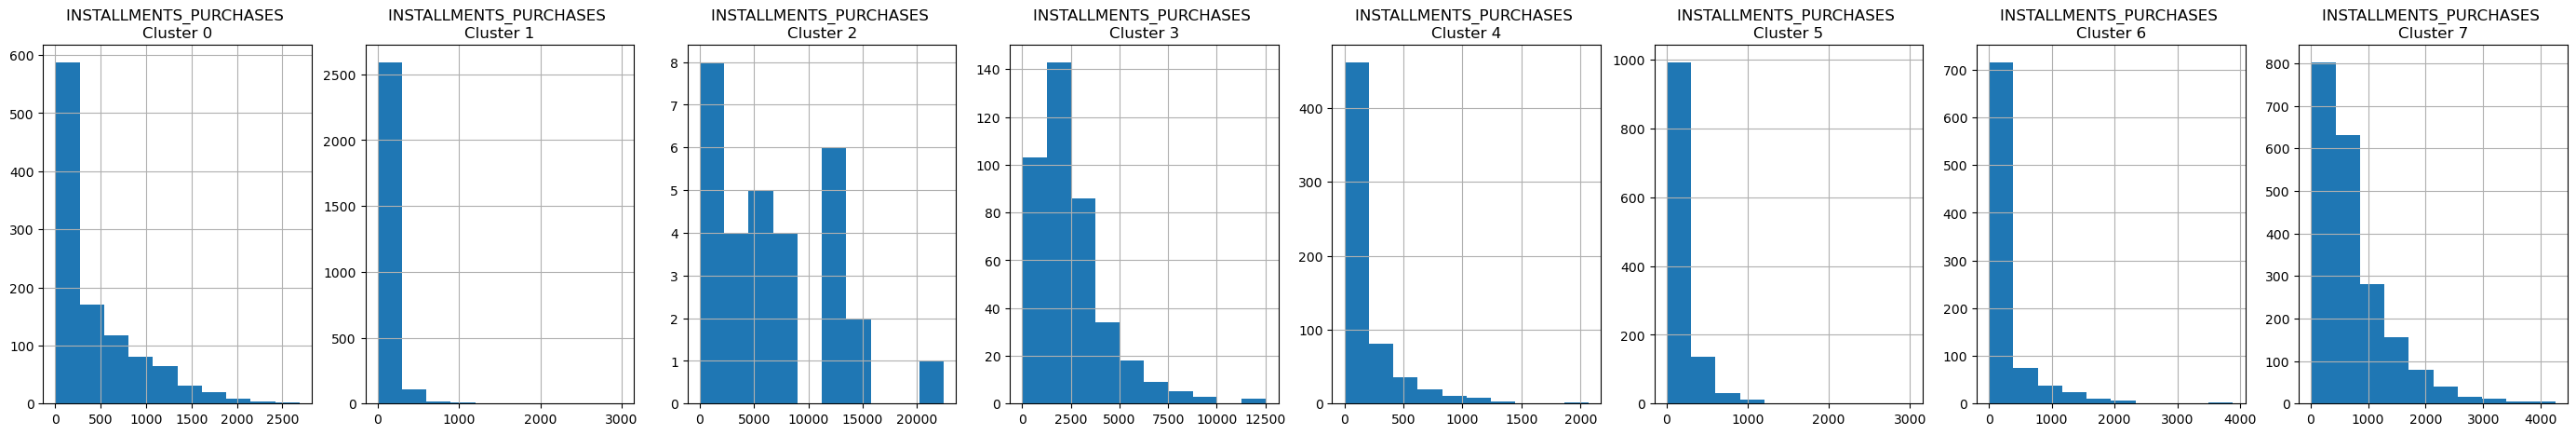

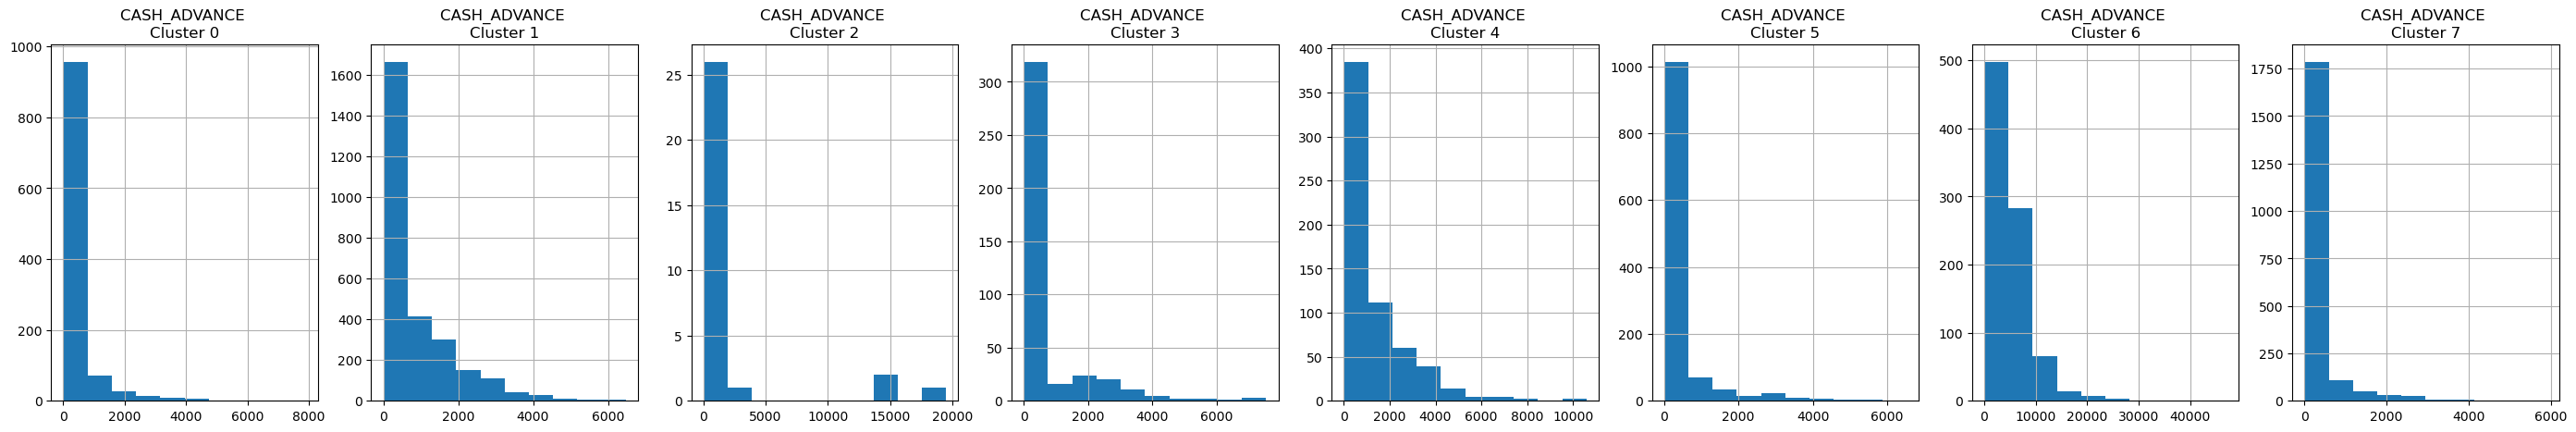

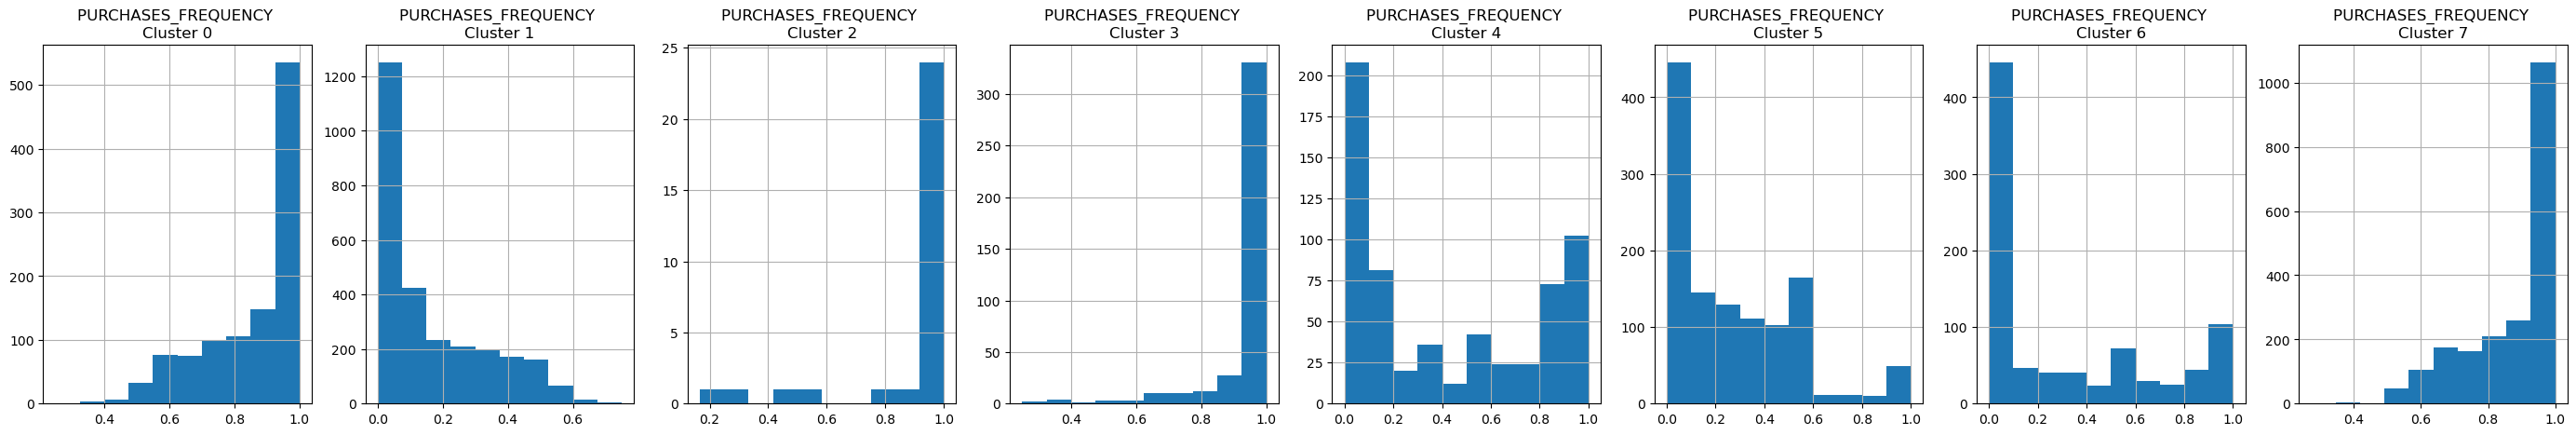

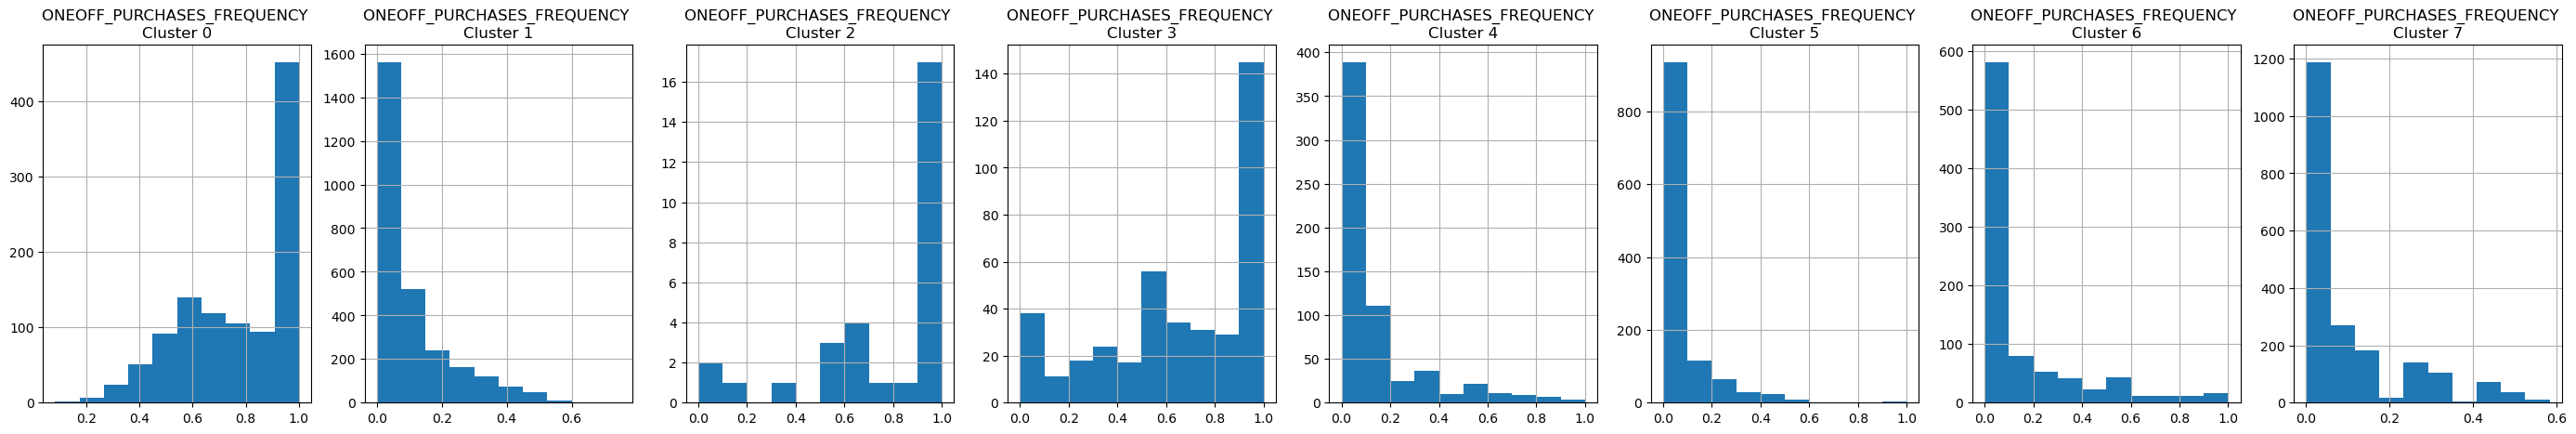

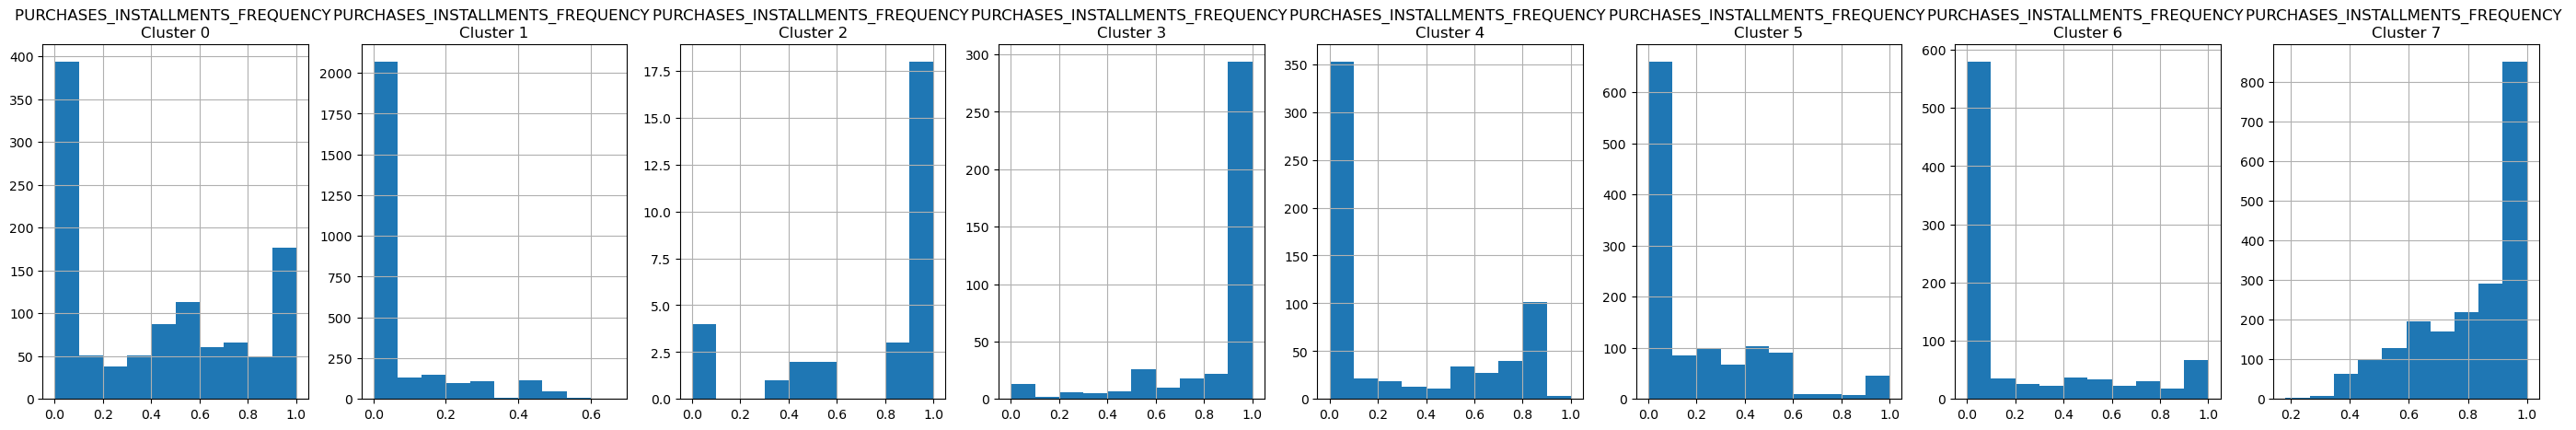

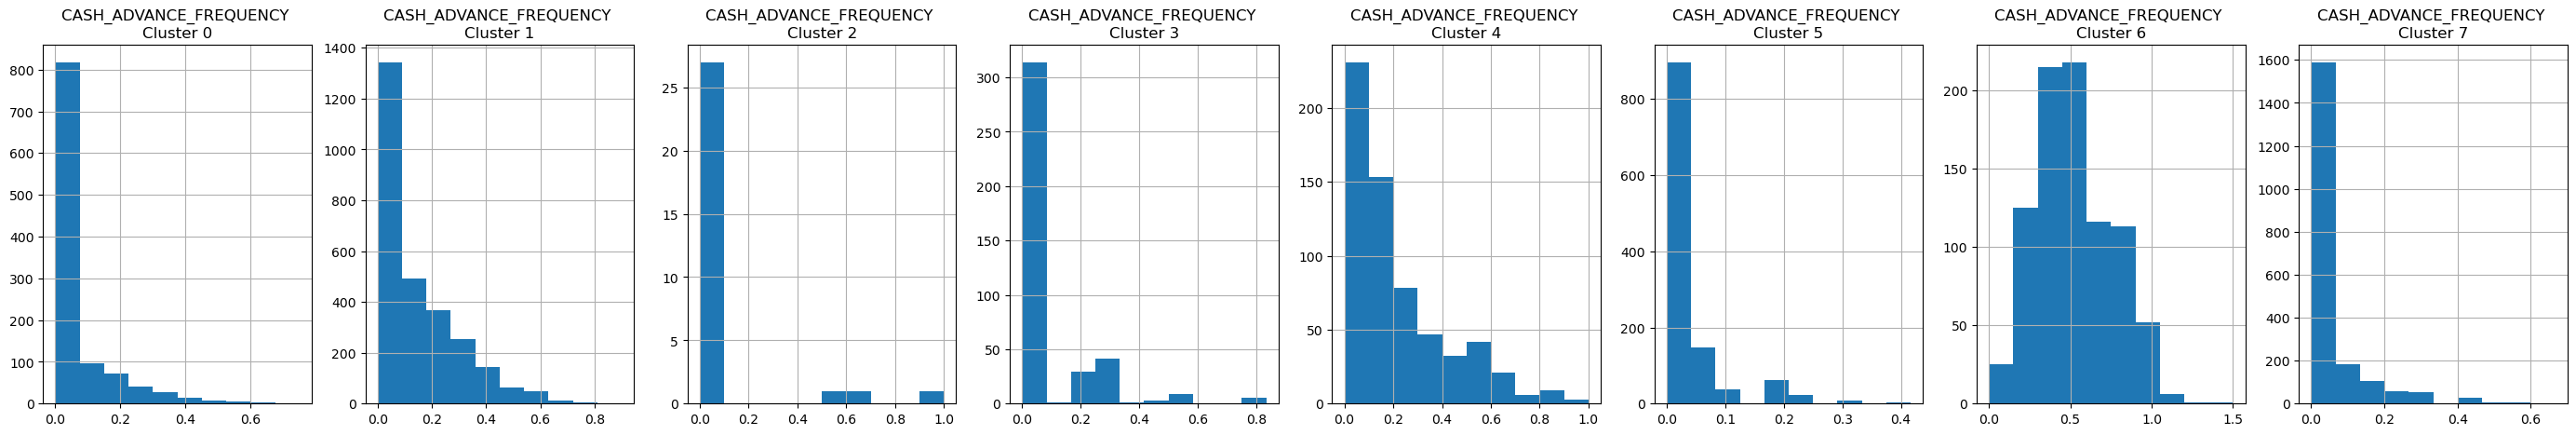

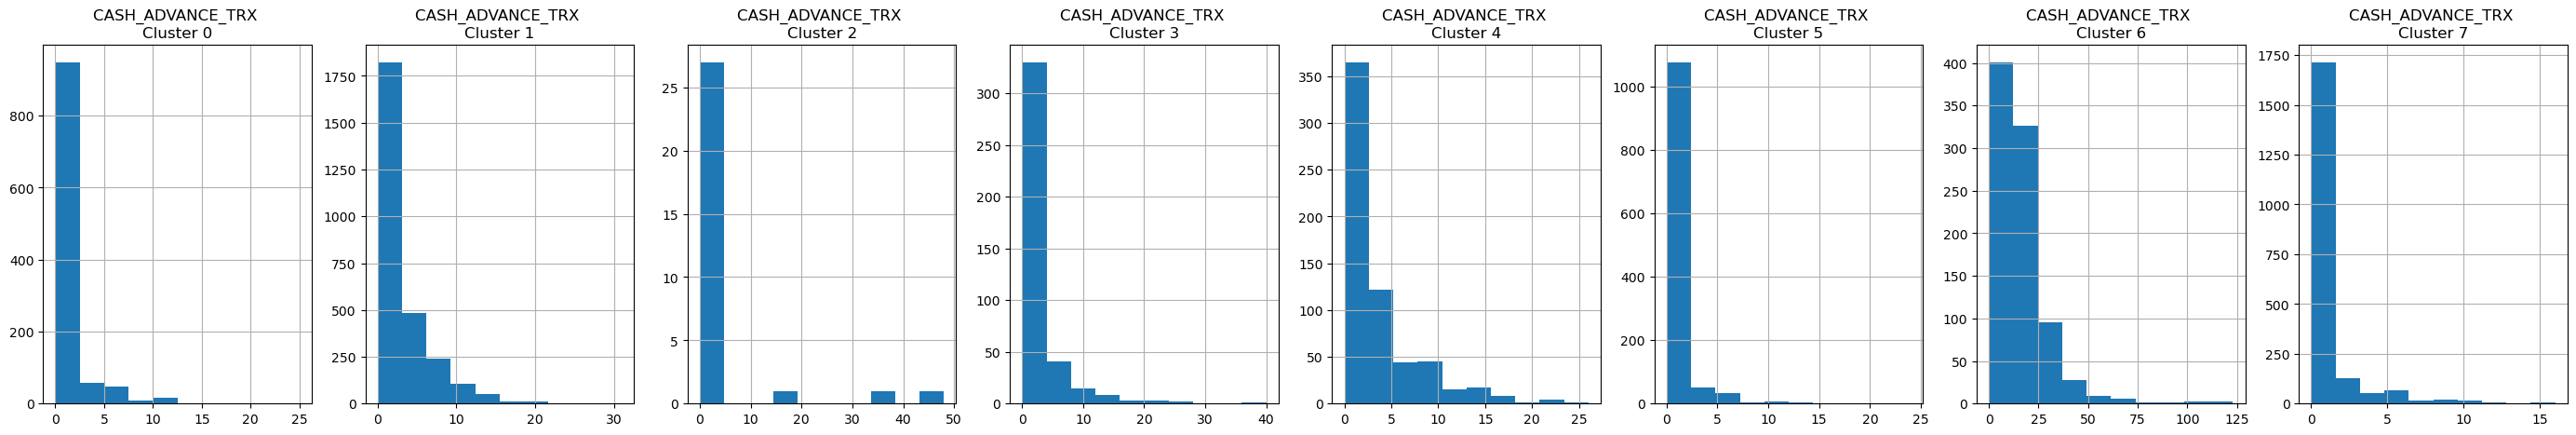

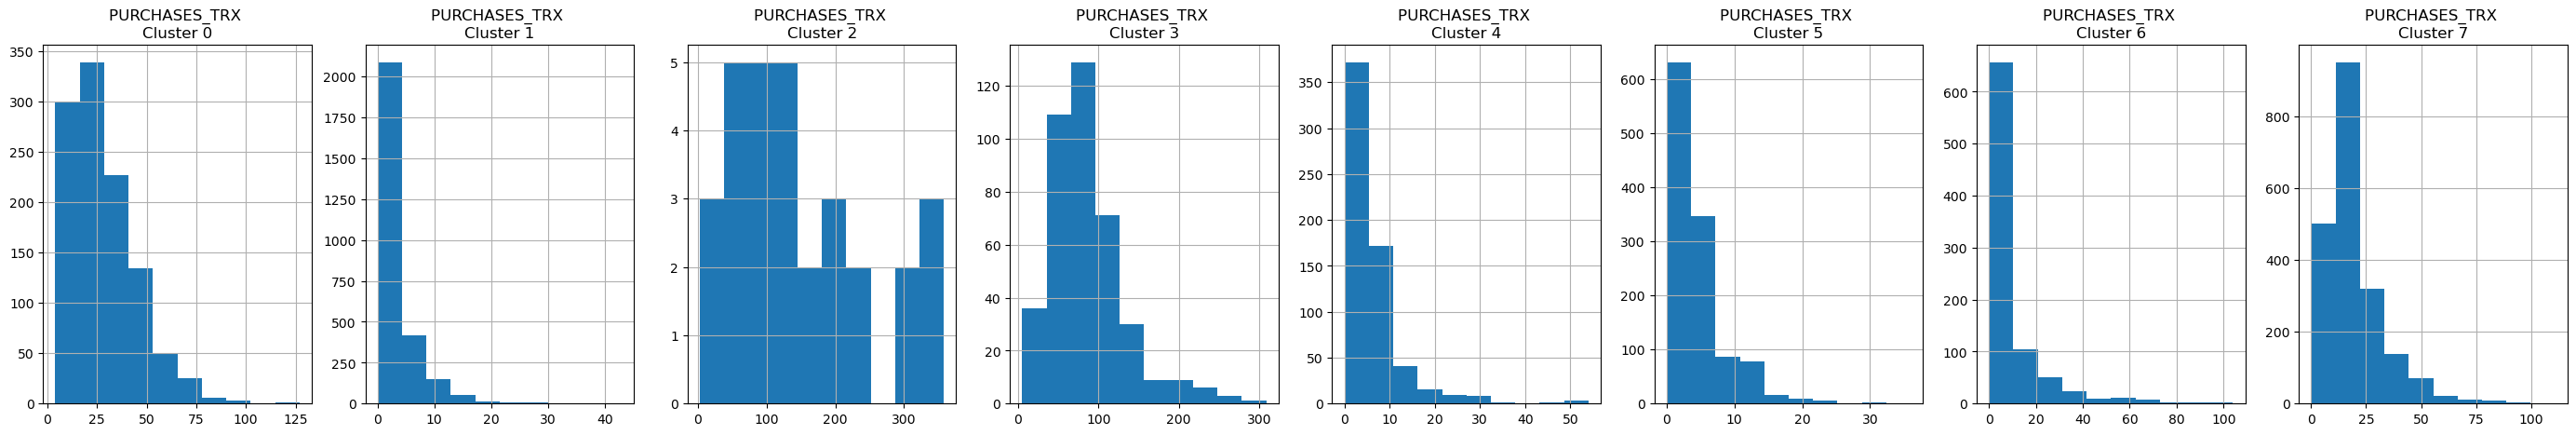

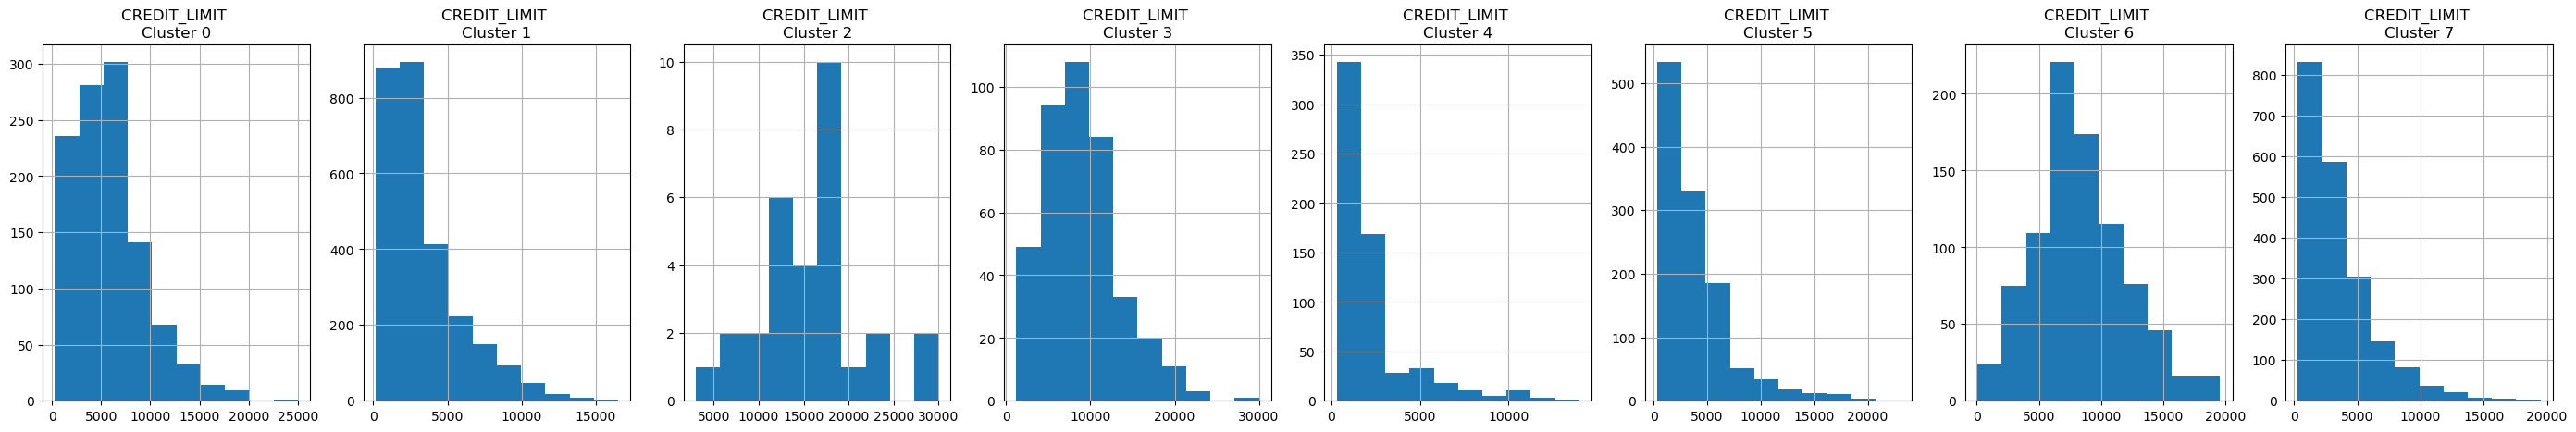

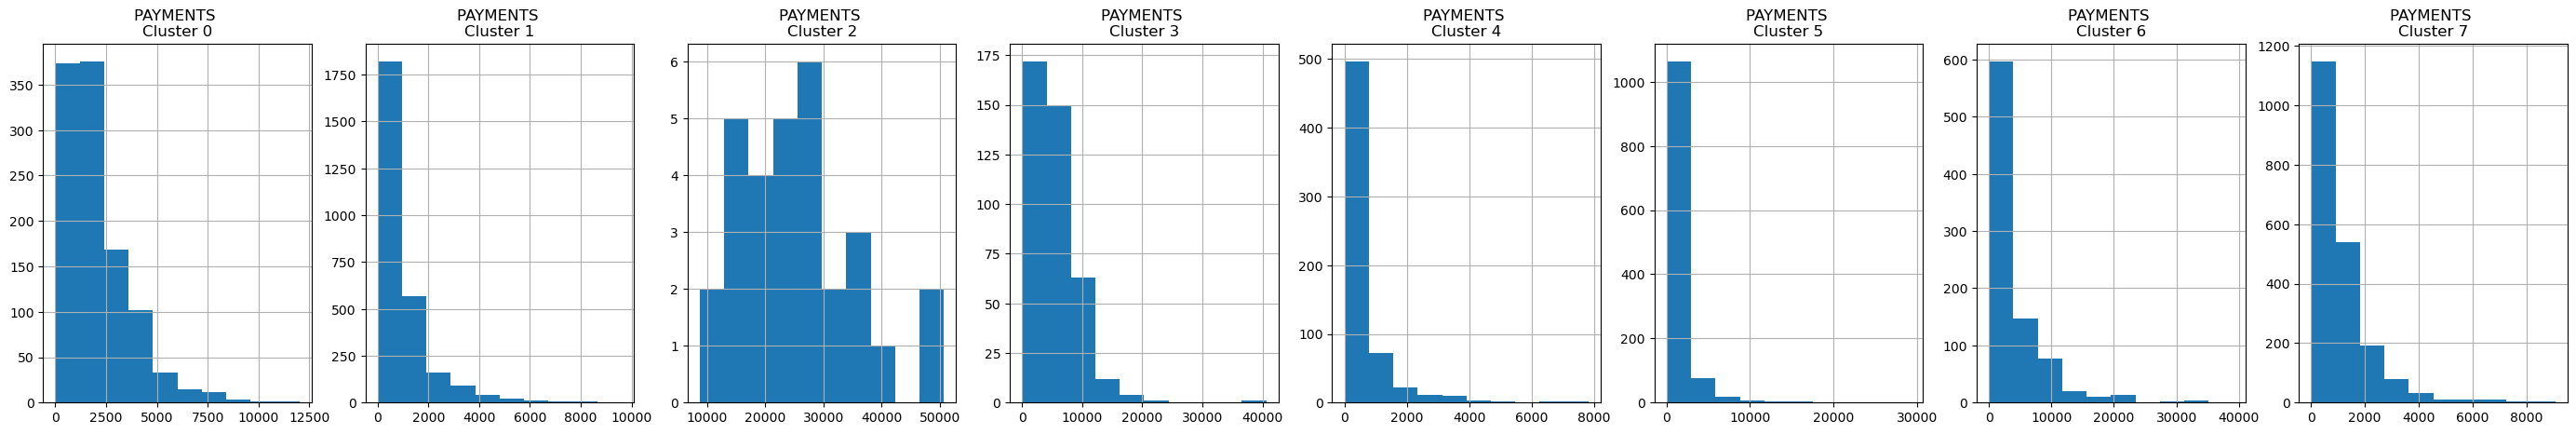

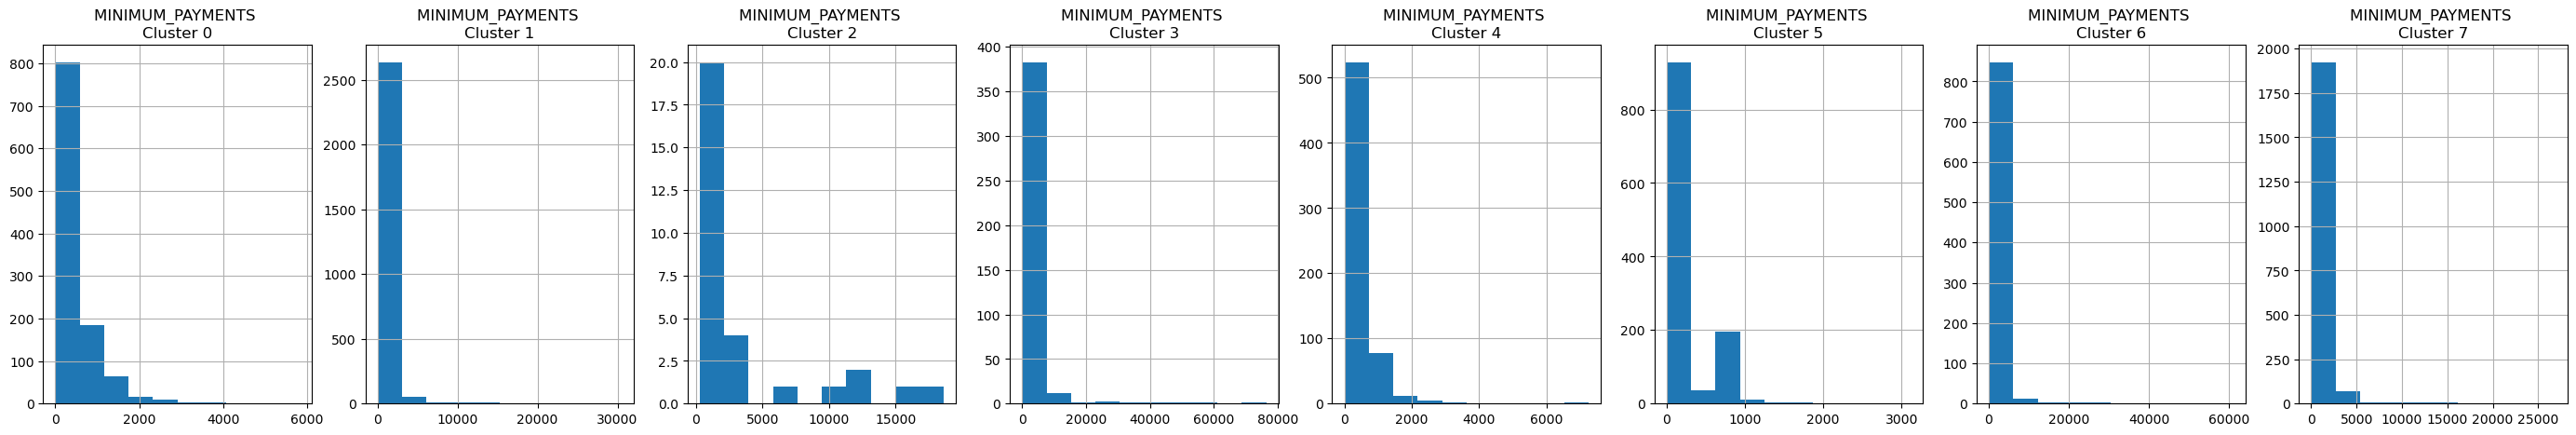

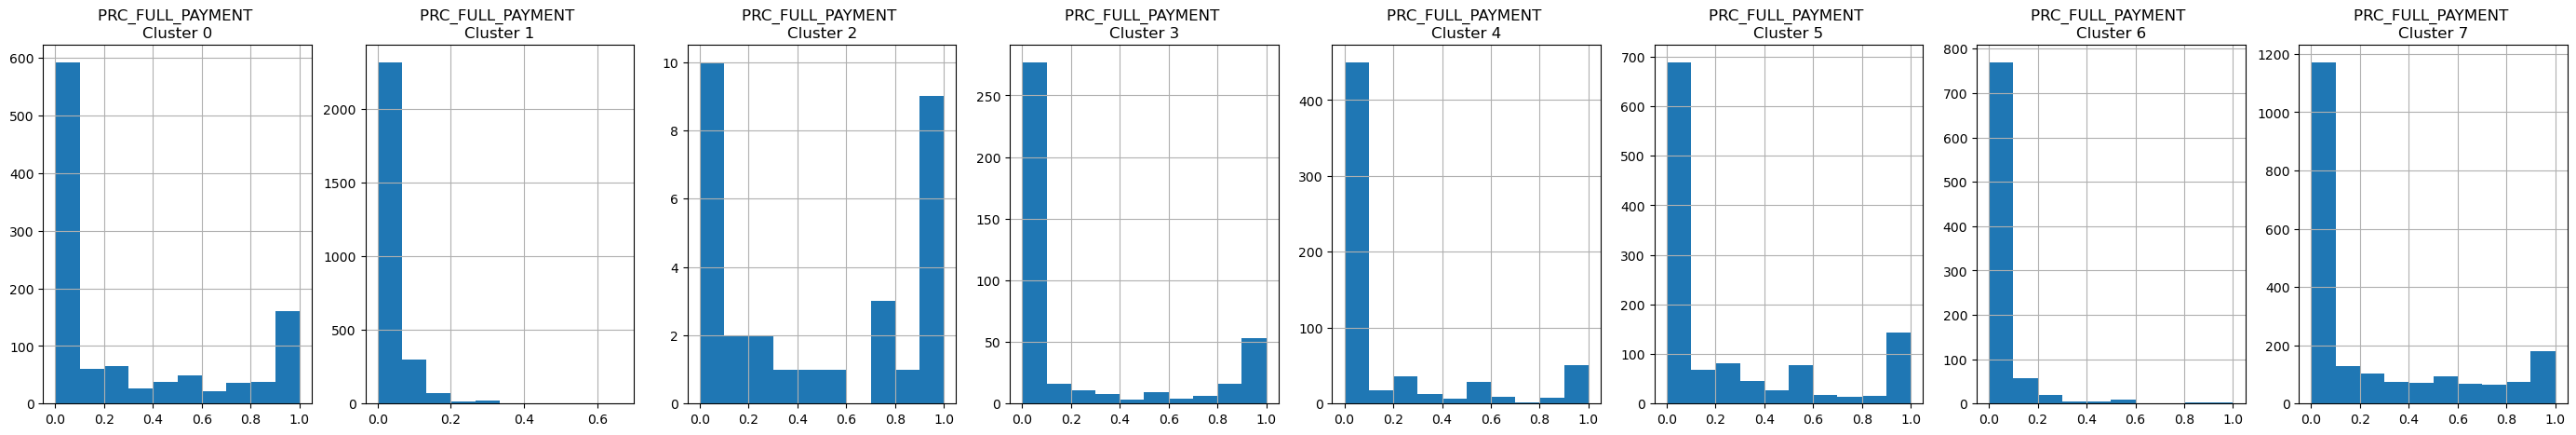

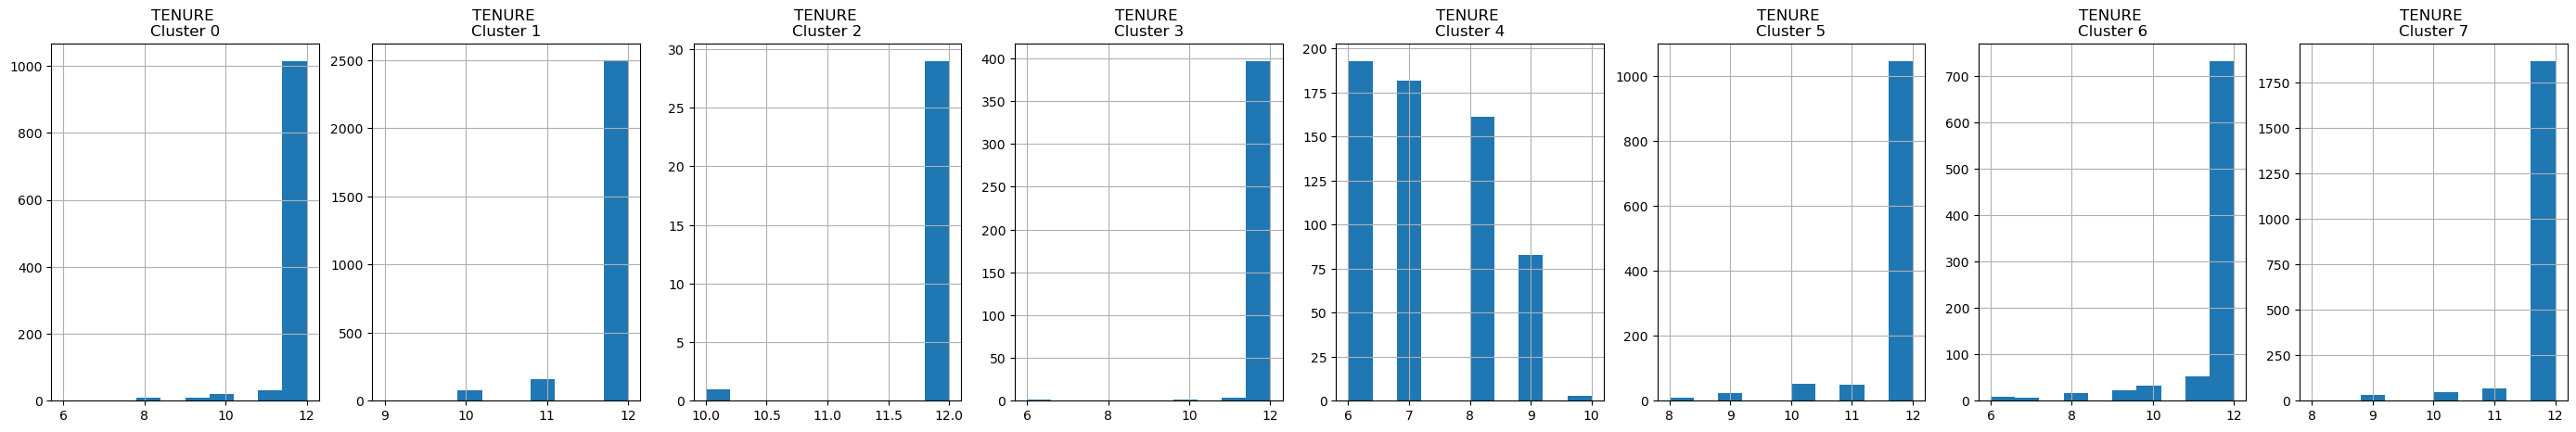

In [24]:
# Plot histogram for each feature and cluster

cols = list(creditcard_df.columns.values)
cols.pop()  # Remove the last column ('Cluster' column)

for col in cols:
    plt.figure(figsize=(35, 5))
    
    for k in range(n_clusters):
        plt.subplot(1, 8, k+1)
        sliced_df = creditcard_df[creditcard_df["Cluster"] == k]
        sliced_df[col].hist()
        plt.title(f"{col} \nCluster {k}")

# Visualize Clusters Using PCA

In [25]:
# Initialize PCA object
pca = PCA(n_components=2, random_state=2023)

# Fit PCA object to data
creditcard_PCA = pca.fit_transform(creditcard_df_scaled)

# Create data frame of principal components
creditcard_PCA = pd.DataFrame(data=creditcard_PCA, columns=['pca1', 'pca2'])
creditcard_PCA

,pca1,pca2
0,-1.682219,-1.076455
1,-1.138287,2.506459
2,0.969675,-0.383483
3,-0.873625,0.043161
4,-1.599433,-0.688584
...,...,...
8945,-0.359630,-2.016145
8946,-0.564370,-1.639124
8947,-0.926204,-1.810787
8948,-2.336550,-0.657979


In [26]:
# Add "Clusters" column

creditcard_PCA["Cluster"] = labels
creditcard_PCA

,pca1,pca2,Cluster
0,-1.682219,-1.076455,1
1,-1.138287,2.506459,6
2,0.969675,-0.383483,0
3,-0.873625,0.043161,1
4,-1.599433,-0.688584,1
...,...,...,...
8945,-0.359630,-2.016145,4
8946,-0.564370,-1.639124,4
8947,-0.926204,-1.810787,4
8948,-2.336550,-0.657979,4


<Axes: xlabel='pca1', ylabel='pca2'>

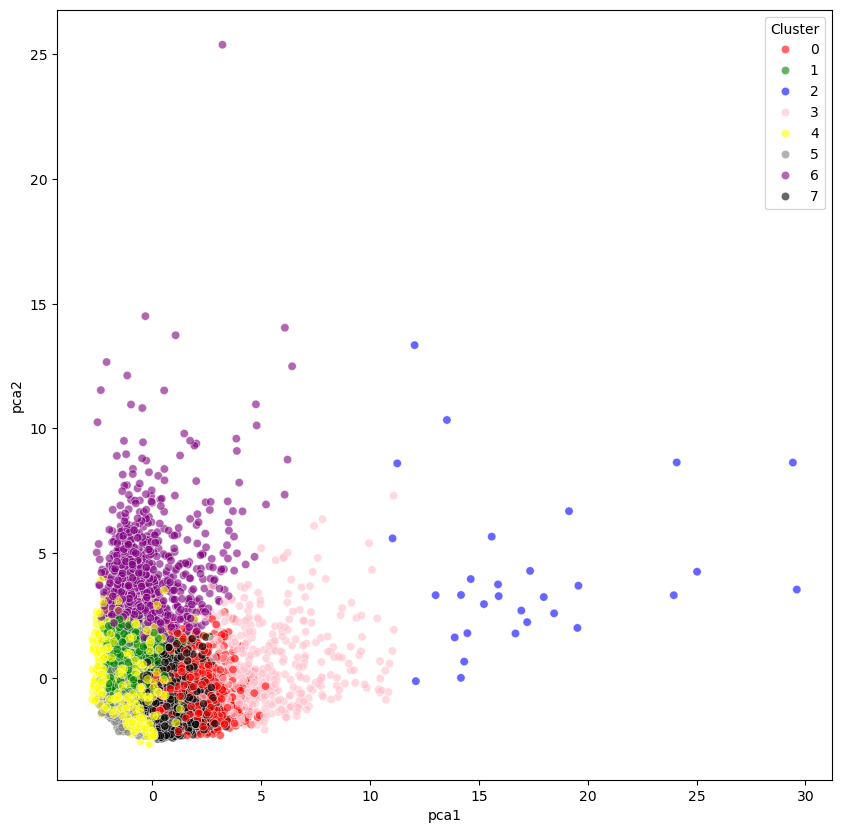

In [27]:
# Create scatter plot

plt.figure(figsize=(10, 10))
sns.scatterplot(creditcard_PCA, x='pca1', y='pca2', hue='Cluster', alpha=.6,
               palette=['red', 'green', 'blue', 'pink', 'yellow', 'gray', 'purple', 'black'])

# Apply Dimensionality Reduction Using Autoencoders

In [30]:
# Import libraries
from tensorflow.keras.layers import (
    Input,
    Add,
    Dense,
    Activation,
    ZeroPadding2D,
    BatchNormalization,
    Flatten,
    Conv2D,
    AveragePooling2D,
    MaxPooling2D,
    Dropout,
)
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

In [32]:
# Build autoencoder

input_layer = Input(shape=(17,))

x = Dense(7, activation='relu')(input_layer)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)

encoded_layer = Dense(10, activation='relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded_layer)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)

decoded_layer = Dense(17,  kernel_initializer = 'glorot_uniform')(x)

autoencoder = Model(input_layer, decoded_layer)

In [33]:
# Build encoder (take the 1st half of the autoencoder)

encoder = Model(input_layer, encoded_layer)

In [34]:
# Compile autoencoder

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [35]:
# Train autoencoder

BATCH = 128
EPOCHS = 25

autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled,
               batch_size=BATCH, epochs=EPOCHS, verbose=1)

Epoch 1/25
70/70 [==============================] - 8s 77ms/step - loss: 0.5653
Epoch 2/25
70/70 [==============================] - 5s 71ms/step - loss: 0.2857
Epoch 3/25
70/70 [==============================] - 5s 72ms/step - loss: 0.2125
Epoch 4/25
70/70 [==============================] - 5s 75ms/step - loss: 0.1912
Epoch 5/25
70/70 [==============================] - 5s 77ms/step - loss: 0.1681
Epoch 6/25
70/70 [==============================] - 5s 78ms/step - loss: 0.1499
Epoch 7/25
70/70 [==============================] - 6s 89ms/step - loss: 0.1413
Epoch 8/25
70/70 [==============================] - 5s 76ms/step - loss: 0.1256
Epoch 9/25
70/70 [==============================] - 6s 79ms/step - loss: 0.1157
Epoch 10/25
70/70 [==============================] - 5s 77ms/step - loss: 0.1048
Epoch 11/25
70/70 [==============================] - 6s 86ms/step - loss: 0.1050
Epoch 12/25
70/70 [==============================] - 5s 77ms/step - loss: 0.1029
Epoch 13/25
70/70 [==================

In [36]:
# Obtain encoded features

pred = encoder.predict(creditcard_df_scaled)
pred

280/280 [==============================] - 2s 5ms/step


array([[0.22389641, 0.87322295, 0.31266162, ..., 0.        , 0.01707075,
        0.        ],
       [2.0989523 , 3.911098  , 2.195763  , ..., 0.        , 0.25813752,
        0.        ],
       [1.1613569 , 1.3467236 , 0.8301683 , ..., 0.        , 1.5745595 ,
        0.        ],
       ...,
       [2.0741212 , 0.08561265, 1.6950817 , ..., 0.        , 0.1587748 ,
        0.        ],
       [2.3770468 , 1.0545335 , 1.6668869 , ..., 0.        , 0.519341  ,
        0.        ],
       [2.070099  , 0.6049294 , 3.058896  , ..., 0.        , 2.20463   ,
        0.        ]], dtype=float32)

In [37]:
pred.shape

(8950, 10)

Text(0, 0.5, 'Inertia')

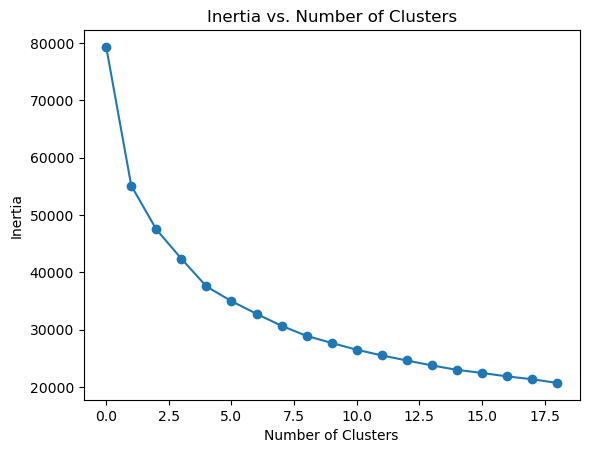

In [38]:
# Apply K-Means clustering on the encoded features

# Obtain optimal number of clusters
inertia = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit_transform(pred)
    inertia.append(kmeans.inertia_)
    

plt.plot(inertia, 'o-')
plt.title("Inertia vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")

In [39]:
# Run the clustering algorithm

n_clusters = 4

kmeans = KMeans(n_clusters, n_init=10, random_state=2023)
kmeans.fit_transform(pred)
labels = kmeans.labels_
labels

array([2, 1, 2, ..., 2, 1, 0])

In [40]:
# Add cluster labels

creditcard_df["Cluster"] = labels
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


# Visualize Autoencoded Clusters Using PCA

In [41]:
# Initialize PCA object
pca = PCA(n_components=2, random_state=2023)

# Fit PCA object to data
autoencoded_PCA = pca.fit_transform(pred)

# Create data frame of principal components
autoencoded_PCA = pd.DataFrame(data=creditcard_PCA, columns=['pca1', 'pca2'])
autoencoded_PCA

,pca1,pca2
0,-1.682219,-1.076455
1,-1.138287,2.506459
2,0.969675,-0.383483
3,-0.873625,0.043161
4,-1.599433,-0.688584
...,...,...
8945,-0.359630,-2.016145
8946,-0.564370,-1.639124
8947,-0.926204,-1.810787
8948,-2.336550,-0.657979


In [42]:
# Add "Clusters" column

autoencoded_PCA["Cluster"] = labels
autoencoded_PCA

,pca1,pca2,Cluster
0,-1.682219,-1.076455,2
1,-1.138287,2.506459,1
2,0.969675,-0.383483,2
3,-0.873625,0.043161,2
4,-1.599433,-0.688584,2
...,...,...,...
8945,-0.359630,-2.016145,2
8946,-0.564370,-1.639124,1
8947,-0.926204,-1.810787,2
8948,-2.336550,-0.657979,1


<Axes: xlabel='pca1', ylabel='pca2'>

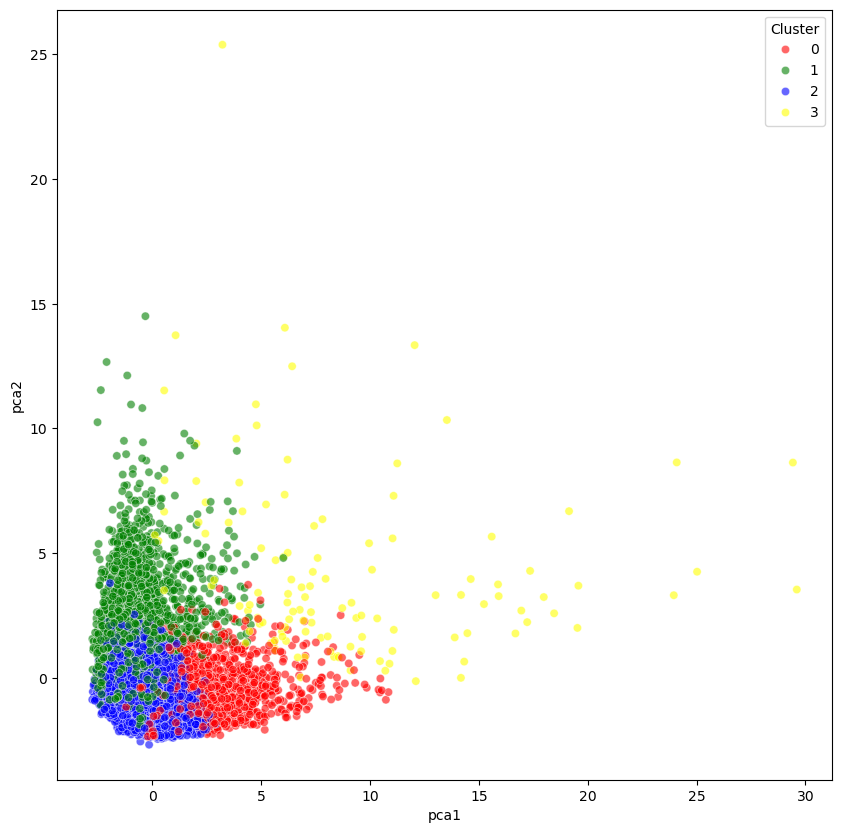

In [43]:
# Create scatter plot

plt.figure(figsize=(10, 10))
sns.scatterplot(autoencoded_PCA, x='pca1', y='pca2', hue='Cluster', alpha=.6,
               palette=['red', 'green', 'blue', 'yellow'])